In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
}))


In [2]:
source('0_parameters.sh')

In [4]:
GWAS_qc_f %>% 
fread() %>%
rename_with(
    function(x){str_replace(x, '#', '')}, starts_with("#")
) -> GWAS_qc_df


In [16]:
file.path(data_d, 'traits_significant.tsv') %>%
fread() %>%
rename_with(
    function(x){str_replace(x, '#', '')}, starts_with("#")
) %>%
left_join(
    GWAS_qc_df %>%
    filter(population == 'white_british') %>%
    select(GBE_ID, h2_obs, h2_obs_se) %>%
    unique %>%
    rename('trait'='GBE_ID'),
    by='trait'
) -> trait_info_df


Warning message:
“Removed 3 rows containing missing values (geom_point).”


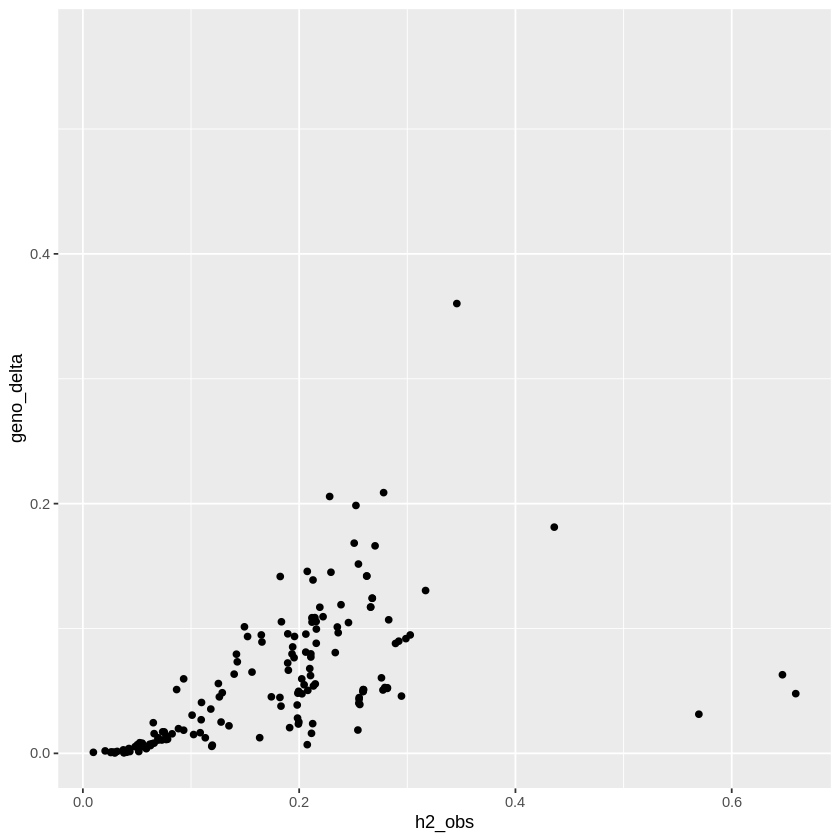

In [30]:
trait_info_df %>%
filter(trait_category != 'Biomarkers', family == 'gaussian') %>%
ggplot(aes(x = h2_obs, y = geno_delta)) +
geom_point()

Warning message:
“Removed 9 rows containing missing values (geom_point).”


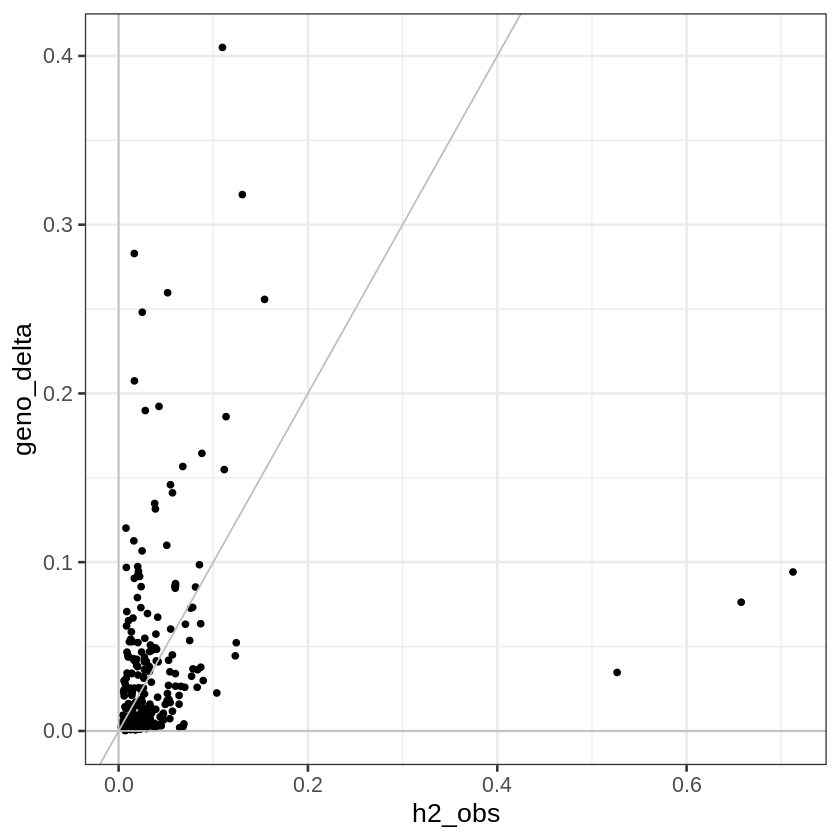

In [34]:
trait_info_df %>%
filter(trait_category != 'Biomarkers', family != 'gaussian') %>%
ggplot(aes(x = h2_obs, y = geno_delta)) +
geom_point() + 
geom_vline(xintercept = 0, color='gray') +
geom_hline(yintercept = 0, color='gray') +
geom_abline(intercept = 0, slope = 1, color='gray') +
theme_bw(base_size=16)
